In [1]:
import sys
sys.path.append("../src/")

In [2]:
# Local imports
from data.make_dataset import *
from models.classifier import *
from models.predict import *
from visualization.visualize import *

In [19]:
%%time  

# This function reads train data(features & target) and merges into single dataframe
df = make_train_dataset()     

Shape of Feature dataset: (260601, 39)
Shape of Target dataset: (260601, 2)
CPU times: user 446 ms, sys: 46.1 ms, total: 492 ms
Wall time: 490 ms


In [5]:
%%time

# Class Classifer invokes setup() method from pycaret.classification
clf=Classifier(df)

,Description,Value
0,session_id,123
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(260601, 40)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,True


CPU times: user 28.5 s, sys: 2.8 s, total: 31.3 s
Wall time: 28.4 s


In [20]:
%%time

# This function creates baseline model with ‘lightgbm’ - Light Gradient Boosting Machine as estimator
baseline=clf.create_baseline_model()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7177,0.8086,0.6159,0.7192,0.7080,0.4560,0.4668
1,0.7119,0.8038,0.6124,0.7117,0.7026,0.4467,0.4562
2,0.7168,0.8092,0.6225,0.7175,0.7080,0.4568,0.4664
3,0.7095,0.8034,0.6103,0.7089,0.7005,0.4432,0.4521
4,0.7120,0.8062,0.6117,0.7122,0.7025,0.4463,0.4562
5,0.7071,0.8035,0.6024,0.7064,0.6974,0.4370,0.4465
6,0.7134,0.8073,0.6112,0.7143,0.7036,0.4479,0.4581
7,0.7154,0.8038,0.6155,0.7165,0.7058,0.4522,0.4628
8,0.7084,0.8018,0.6077,0.7090,0.6984,0.4381,0.4489


CPU times: user 2min 9s, sys: 8.79 s, total: 2min 18s
Wall time: 18.2 s


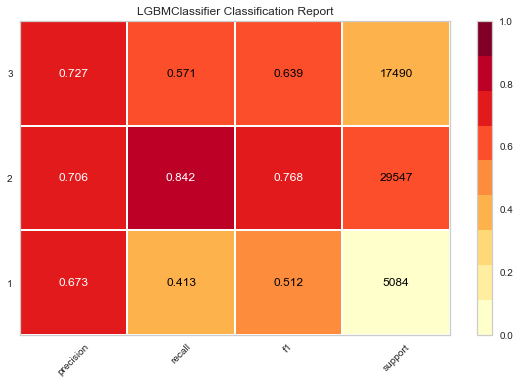

CPU times: user 4.57 s, sys: 527 ms, total: 5.09 s
Wall time: 657 ms


In [7]:
%%time

# This function analyzes the performance of a trained model with 
# plot/estimator as ‘class_report’ - Classification Report
plot_report(baseline)

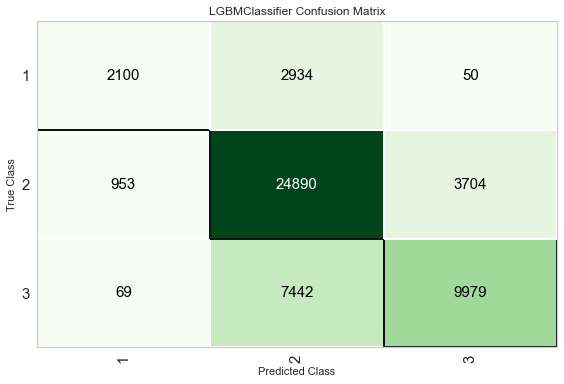

In [8]:
# This function analyzes the performance of a trained model with 
# plot/estimator as ‘confusion_matrix’ - Confusion Matrix
plot_confusion_matrix(baseline)

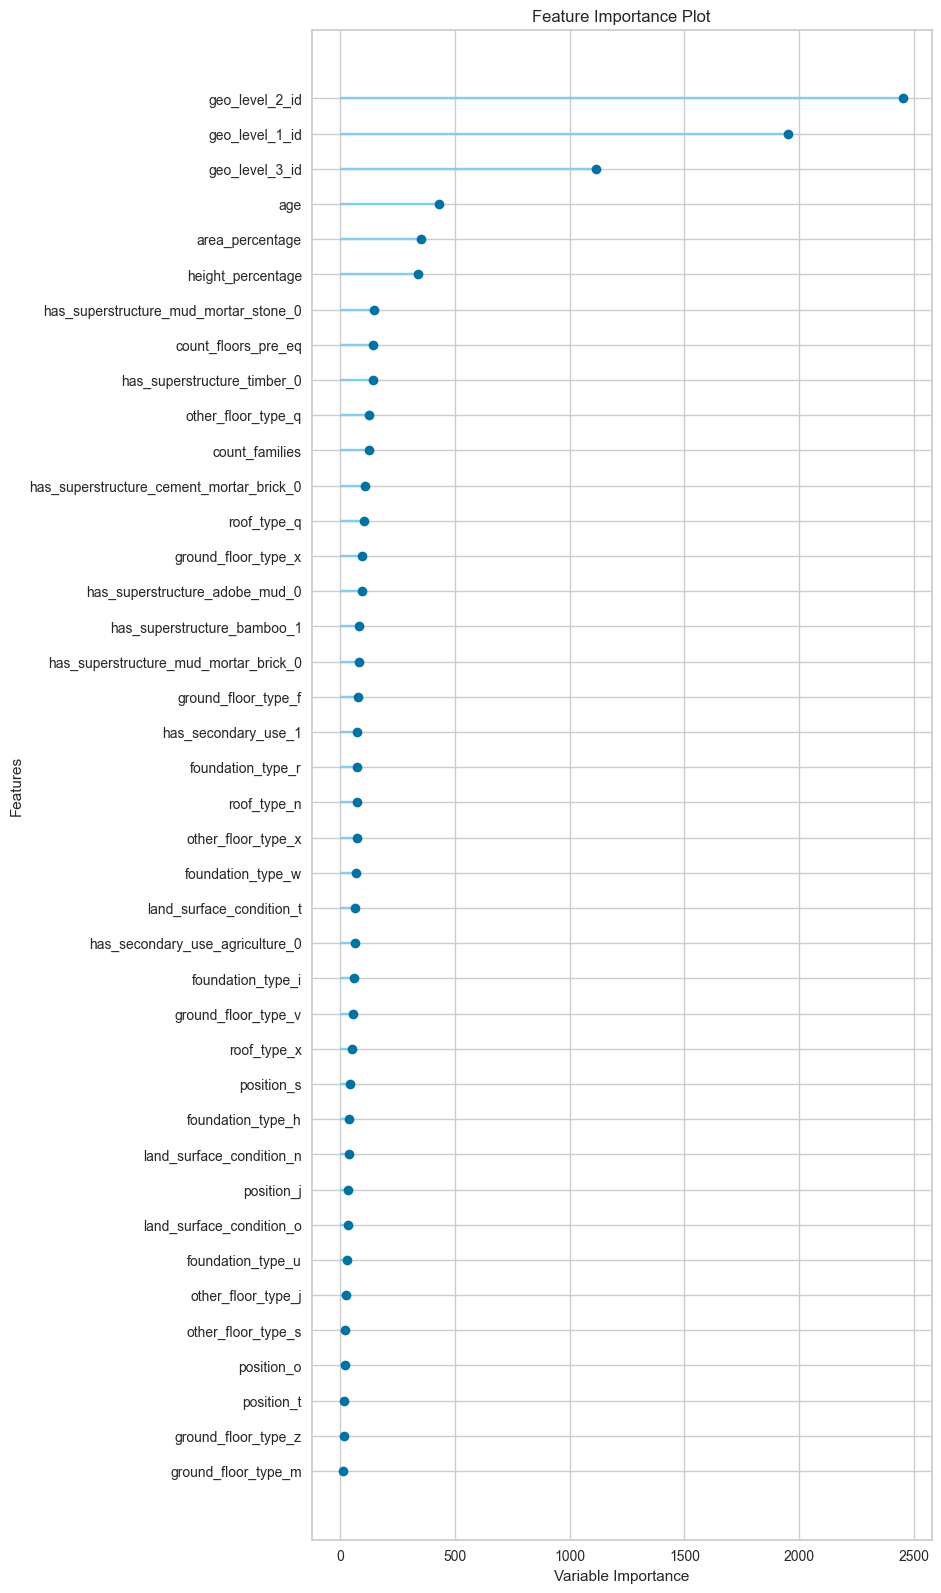

In [9]:
# This function analyzes the performance of a trained model with 
# plot/estimator as ‘feature_all’ - Feature Importance (All)
plot_feature_importance(baseline)

In [21]:
%%time

# This function creates tuned model with hyperparameters 
# (learning_rate, n_estimators, num_leaves, reg_alpha, reg_lambda)
tuned_model=clf.create_tuned_model()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7436,0.8406,0.6622,0.7437,0.7377,0.5145,0.5213
1,0.7399,0.8401,0.6608,0.7390,0.7346,0.5097,0.5153
2,0.7439,0.8421,0.6696,0.7429,0.7391,0.5186,0.5236
3,0.7392,0.8399,0.6628,0.7381,0.7343,0.5100,0.5149
4,0.7415,0.8411,0.6629,0.7412,0.7360,0.5119,0.5180
5,0.7399,0.8379,0.6596,0.7389,0.7347,0.5099,0.5152
6,0.7404,0.8391,0.6653,0.7400,0.7351,0.5102,0.5161
7,0.7438,0.8406,0.6679,0.7433,0.7385,0.5170,0.5228
8,0.7390,0.8367,0.6558,0.7386,0.7329,0.5057,0.5124


CPU times: user 6min 17s, sys: 18 s, total: 6min 35s
Wall time: 50.4 s


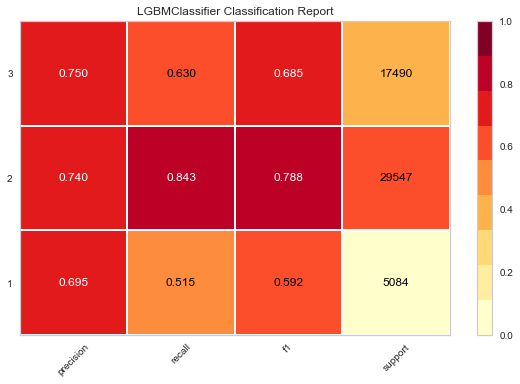

In [11]:
# This function analyzes the performance of a tuned model with 
# plot/estimator as ‘class_report’ - Classification Report
plot_report(tuned_model)

In [12]:
# This function reads test data
test_dataset = make_test_dataset()

Shape of Test dataset: (86868, 39)


In [13]:
%%time

# Predicts Target & Score (probability of predicted class) using a trained model,
# then save the prediction in csv file.
predict_and_store_result(tuned_model, test_dataset)

CPU times: user 23.5 s, sys: 858 ms, total: 24.3 s
Wall time: 8.66 s
